In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
train = pd.read_csv('/content/mnist_train.csv').dropna()
test = pd.read_csv('/content/mnist_test.csv').dropna()

In [7]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31541,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31542,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31543,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31544,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y_train = train['label']
x_train = train.drop('label',axis=1)

In [9]:
y_test = test['label']
x_test = test.drop('label',axis=1)

In [10]:
x_train.shape

(31546, 784)

In [14]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
y_train.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [17]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [18]:
y_train.shape

(31546, 10)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Flatten, Dense, Dropout


In [20]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),

    Flatten(),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,410 (1.49 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_test,y_test),
    batch_size=128,
    shuffle=True
)

Epoch 1/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 31s 114ms/step - accuracy: 0.8051 - loss: 0.6383 - val_accuracy: 0.9758 - val_loss: 0.0741
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.9816 - loss: 0.0644 - val_accuracy: 0.9824 - val_loss: 0.0507
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.9863 - loss: 0.0408 - val_accuracy: 0.9878 - val_loss: 0.0385
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 0.9893 - val_loss: 0.0316
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 27s 110ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.9876 - val_loss: 0.0369
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 27s 109ms/step - accuracy: 0.9950 - loss: 0.0170 - val_accuracy: 0.9840 - val_loss: 0.0462
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9879 - val_loss: 0.0380
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.9962 - loss: 0

<Axes: >

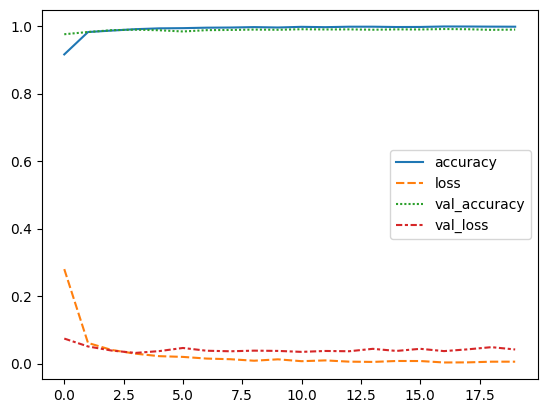

In [25]:
import seaborn as sns
sns.lineplot(model.history.history)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


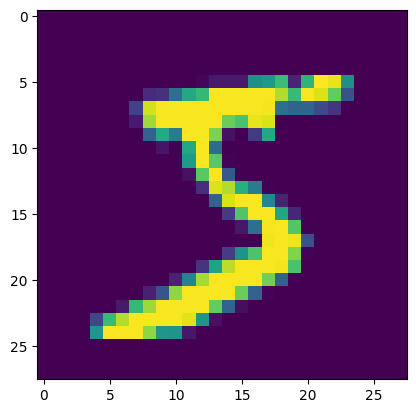

In [27]:
plt.imshow(x_train[0])
print(y_train[0])

In [28]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


2


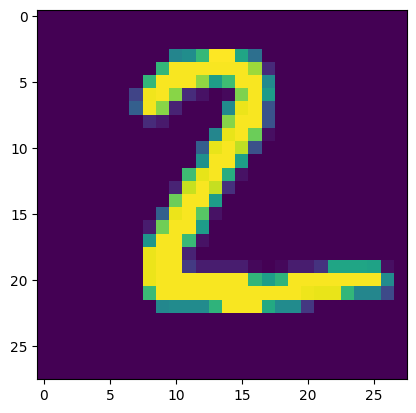

In [30]:
plt.imshow(x_test[1])
print(np.argmax(predictions[1]))
#

In [33]:
model.history.history['accuracy']

[0.915995717048645,
 0.9823115468025208,
 0.986686110496521,
 0.9907753467559814,
 0.993247926235199,
 0.9938502311706543,
 0.9952450394630432,
 0.9956888556480408,
 0.9969251155853271,
 0.9957839250564575,
 0.9977493286132812,
 0.9967666268348694,
 0.9980980157852173,
 0.9981297254562378,
 0.9972104430198669,
 0.9974006414413452,
 0.9987953901290894,
 0.9986686110496521,
 0.9983199238777161,
 0.9981297254562378]